In [2]:
from transformers import pipeline

# Tải mô hình
sentiment_pipeline = pipeline("sentiment-analysis", model="wangzes-kevo/soccer-tweet-sentiment")



Device set to use cuda:0


In [3]:
# Kiểm tra mô hình với một tweet ví dụ
tweet = "Binh don't need to play anymore, should go home and play with mom"
result = sentiment_pipeline(tweet)
print(result)

[{'label': 'negative', 'score': 0.6393948197364807}]


In [4]:
type(result[0])

dict

In [5]:
import pandas as pd

from tqdm import tqdm  # Import thư viện tqdm
file_path = r"C:\Users\DO TUAN MINH\Desktop\ben\Learn\Reddit_Sentiment_Analysis\dataframe\comments_data.csv"
df = pd.read_csv(file_path)
# Hàm phân tích cảm xúc
def analyze_comment(comment):
    try:
        if pd.isna(comment) or comment.strip() == "":
            return pd.Series(["NEUTRAL", 0.0])  # Xử lý comment trống
        result = sentiment_pipeline(comment)
        sentiment = result[0]["label"]
        score = result[0]["score"]
        return pd.Series([sentiment, score])  # Trả về một Series để tạo thành hai cột mới
    except Exception as e:
        print(f"Lỗi khi xử lý comment: {comment}, Lỗi: {e}")
        return pd.Series(["ERROR", 0.0])  # Trả về giá trị mặc định nếu có lỗi

# Áp dụng hàm lên dataframe với thanh tiến trình tqdm
tqdm.pandas()  # Kích hoạt tqdm cho pandas
df[["Sentiment", "Score"]] = df["comment_text"].progress_apply(analyze_comment)  # Sử dụng progress_apply thay cho apply

# In kết quả
print("Hoàn thành xử lý!")
print(df.head())

 32%|███▏      | 60160/186304 [08:28<14:01, 149.83it/s]

Lỗi khi xử lý comment: Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. 
Leicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL  Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in for that LB position. I honestly wld still rather have him over Zinchenko anyday (still love Zinny) but I still do belei

 69%|██████▉   | 128930/186304 [16:05<06:15, 152.72it/s]

Lỗi khi xử lý comment: Tell me what you guys think about this premier league table...What emojis can be used for what teams? I tried as best I could lol

| Pos. | 🏆 Team                  | MP | W  | D  | L  | GF | GA | GD  | P  | Form                |
|------|--------------------------|----|----|----|----|----|----|-----|----|---------------------|
| 1    | 🔴 Liverpool            | 12 | 10 | 1  | 1  | 24 | 8  | +16 | 31 | ✅ ✅ ✅ 🤝 ✅       |
| 2    | 🔴 Arsenal              | 13 | 7  | 4  | 2  | 26 | 14 | +12 | 25 | ✅ ✅ 🤝 ❌ 🤝       |
| 3    | 🟡 Brighton             | 13 | 6  | 5  | 2  | 22 | 17 | +5  | 23 | 🤝 ✅ ✅ ❌ 🤝       |
| 4    | 🔵 Manchester City      | 12 | 7  | 2  | 3  | 22 | 17 | +5  | 23 | ❌ ❌ ❌ ✅ ✅       |
| 5    | 🔵 Chelsea              | 12 | 6  | 4  | 2  | 23 | 14 | +9  | 22 | ✅ 🤝 🤝 ✅ ❌       |
| 6    | 🌳 Nottingham Forest    | 13 | 6  | 4  | 3  | 16 | 13 | +3  | 22 | ✅ ❌ ❌ ✅ ✅       |
| 7    | 🐝 Brentford            | 13 | 6  | 2  | 5  | 26 | 23 | +3  | 20 | ✅ 🤝 ✅ ❌ ✅       

100%|██████████| 186304/186304 [22:19<00:00, 139.12it/s]

Hoàn thành xử lý!
         match_time  matchday          home_team away_team  home_score  \
0  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
1  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
2  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
3  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
4  2024-08-16 19:00         1  Manchester United    Fulham         1.0   

   away_score                winner       referee comment_id  post_id  \
0         0.0  Manchester United FC  Robert Jones    lig7w2h  1etwv7n   
1         0.0  Manchester United FC  Robert Jones    lig7wlr  1etwv7n   
2         0.0  Manchester United FC  Robert Jones    lig7wu5  1etwv7n   
3         0.0  Manchester United FC  Robert Jones    lig7xl9  1etwv7n   
4         0.0  Manchester United FC  Robert Jones    lig7ydl  1etwv7n   

                                        comment_text  comment_time  \
0             I am ready I h

In [10]:
df

,match_time,matchday,home_team,away_team,home_score,away_score,winner,referee,comment_id,post_id,comment_text,comment_time,comment_author,comment_score,comment_length,Sentiment,Score
0,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7w2h,1etwv7n,I am ready I have my Gamst stream open,1.723835e+09,HowardBunnyColvin,1.0,38,positive,0.892859
1,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7wlr,1etwv7n,Premier League is back!!!,1.723835e+09,NinjaGoalie97,3.0,25,positive,0.973792
2,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7wu5,1etwv7n,That sky advert was absolutely rotten. Melodramatic shite,1.723835e+09,Ajax_Trees_Again,10.0,57,negative,0.953239
3,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7xl9,1etwv7n,"Put it on at 7.30 whilst I made dinner and the number of betting adverts I heard in the background was ridiculous. \n\nAnyway, excited football is back!",1.723835e+09,tocitus,7.0,150,positive,0.887658
4,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7ydl,1etwv7n,cam on fulham,1.723835e+09,SirBarkington,1.0,13,neutral,0.778252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186299,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mch5205,1inz7qb,You can tell this really is the best thing to happen to Everton fans since they qualified for Europa in 2017 lol. They will be holding on to this draw for a good long time.,1.739411e+09,Footyfooty42069,-6.0,172,positive,0.979222
186300,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mcheprv,1inz7qb,"I know right, imagine going that mental over a draw.",1.739414e+09,Anonymous,1.0,52,negative,0.899095
186301,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mchk4nd,1inz7qb,"ChadTheGooner with a Man U flair commenting about loving Everton. \nFucking beggars belief. Choose 1 of them & stick to it, you absolute fucking weapon.",1.739416e+09,bob-noxious,1.0,151,negative,0.910617
186302,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mciv7os,1inz7qb,Everton have always been my 4th team,1.739439e+09,ChadTheGooner,1.0,36,positive,0.783372


In [11]:
# Lọc các dòng có cột Sentiment là NaN
nan_sentiment_rows = df[df["Sentiment"]=="ERROR"]

# In ra các dòng bị lỗi
if not nan_sentiment_rows.empty:
    print("Các dòng bị lỗi khi xử lý sentiment:")
    print(nan_sentiment_rows[["comment_text", "Sentiment", "Score"]])
else:
    print("Không có dòng nào bị lỗi.")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
nan_sentiment_rows["comment_text"]

Các dòng bị lỗi khi xử lý sentiment:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

60132     Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. \nLeicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL  Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in for that LB position. I honestly wld still rather have him over Zinchenko anyday (still love Zinny) but I still do beleive Benny as 

In [15]:
df[df["Sentiment"]=="ERROR"]

,match_time,matchday,home_team,away_team,home_score,away_score,winner,referee,comment_id,post_id,comment_text,comment_time,comment_author,comment_score,comment_length,Sentiment,Score
60132,2024-09-28 14:00,6,Arsenal,Leicester City,4.0,2.0,Arsenal FC,Sam Barrott,lpggml8,1frey5d,"Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. \nLeicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in for that LB position. I honestly wld still rather have him over Zinchenko anyday (still love Zinny) but I still do beleive Benny as RB and Timber at LB is the better option defensively. I won't question the decisions of the Manager though bcuz he is getting results while we still are not playing our best and are missing our talisman in Ode. \nQuick side note I'm curious to see if he wld ever consider the option of Zinny in the Mf. I find he is a liability defensively but good going forward yet he still lacks finishing. Just a though. \n\nEntire point being a team incorporating 2 new defenders, missing their Captain and talisman in Ode, who have suffered 2 very harsh referee decisions resulting in their only dropped points this season are questioned for their credentials to compete. Their closest competitors needed a literal last minute equalizer at home whilst playing a man up for an entire half. The other team has suffered an early loss, does not seem defensively comfortable and is missing their best defender. \n\nToday Arsenal had 37 shots (17 On goal) If they game remained 2-2 that wld have been a fantastic defensive performance by Leicster and their GK. The fact Arsenal got the points shldnt be a detriment. They created the opportunities. They didnt look devoid of creativity. We move on though. I'm truly glad to see this season might shape up to be highly competitive. City are City and I'm sure their checks cleared so they will be up there. Liverpool look exciting under a new Manager and while they arnt the defensive force they have been they are still solid and are among the best going forward. Chelsea seem to be clicking offensively. I still think they will falter defensively which will hold them back at times but they are truly exciting going forward and wont be easy to contain or beat.",1.727592e+09,MateusAmadeus714,2.0,2677,ERROR,0.0
128916,2024-12-01 16:00,13,Liverpool,Manchester City,2.0,0.0,Liverpool FC,Chris Kavanagh,lzwds6u,1h464hu,Tell me what you guys think about this premier league table...What emojis can be used for what teams? I tried as best I could lol\n\n| Pos. | 🏆 Team | MP | W | D | L | GF | GA | GD | P | Form |\n|------|--------------------------|----|----|----|----|----|----|-----|----|---------------------|\n| 1 | 🔴 Liverpool | 12 | 10 | 1 | 1 | 24 | 8 | +16 | 31 | ✅ ✅ ✅ 🤝 ✅ |\n| 2 | 🔴 Arsenal | 13 | 7 | 4 | 2 | 26 | 14 | +12 | 25 | ✅ ✅ 🤝 ❌ 🤝 |\n| 3 | 🟡 Brighton | 13 | 6 | 5 | 2 | 22 | 17 | +5 | 23 | 🤝 ✅ ✅ ❌ 🤝 |\n| 4 | 🔵 Manchester City | 12 | 7 | 2 | 3 | 22 | 17 | +5 | 23 | ❌ ❌ ❌ ✅ ✅ |\n| 5 | 🔵 Chelsea | 12 | 6 | 4 | 2 | 23 | 14 | +9 | 22 | ✅ 🤝 🤝 ✅ ❌ |\n| 6 | 🌳 Nottingham Forest | 13 | 6 | 4 | 3 | 16 | 13 | +3 | 22 | ✅ ❌ ❌ ✅ ✅ |\n| 7 | 🐝 Brentford | 13 | 6 | 2 | 5 | 26 | 23 | +3 | 20 | ✅ 🤝 ✅ ❌ ✅ |\n| 8 | 🐓 Tottenham Hotspur | 12 | 6 | 1 | 5 | 27 | 13 | +14 | 19 | ✅ ❌ ✅ ❌ ✅ |\n| 9 | 🟣 A

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DO TUAN MINH\Desktop\ben\Learn\DAP391m\Hugging_Face_comments_sentiment.csv")

In [2]:
df

,match_time,matchday,home_team,away_team,home_score,away_score,winner,referee,comment_id,post_id,comment_text,comment_time,comment_author,comment_score,comment_length,Sentiment,Score
0,2024-09-28 14:00,6,Arsenal,Leicester City,4.0,2.0,Arsenal FC,Sam Barrott,lpggml8,1frey5d,Yeah honestly a bit frustrating when pundits s...,1.727592e+09,MateusAmadeus714,2.0,2677,neutral,0.000000
1,2024-12-01 16:00,13,Liverpool,Manchester City,2.0,0.0,Liverpool FC,Chris Kavanagh,lzwds6u,1h464hu,Tell me what you guys think about this premier...,1.733075e+09,VivaLosHeavies,2.0,2347,neutral,0.000000
2,2024-09-01 15:00,3,Manchester United,Liverpool,0.0,3.0,Liverpool FC,Anthony Taylor,ll363go,1f6j9hv,The problem with United is not new. They keep ...,1.725244e+09,benhanks040888,1.0,2044,neutral,0.680526
3,2024-11-09 17:30,11,Brighton & Hove Albion,Manchester City,2.0,1.0,Brighton & Hove Albion FC,Sam Barrott,lwhjgnz,1gnhuuj,Rb: Walker is past it. Rico is not good enough...,1.731278e+09,Sneaky-Alien,2.0,1955,negative,0.569821
4,2024-09-01 15:00,3,Manchester United,Liverpool,0.0,3.0,Liverpool FC,Anthony Taylor,ll0x1qm,1f6j9hv,ETH is a weird one. \n\nI'm pretty sure there ...,1.725215e+09,tocitus,1.0,1817,negative,0.943051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186299,NaN,5,Aston Villa,Wolverhampton Wanderers,3.0,1.0,Aston Villa FC,Tim Robinson,NaN,NaN,NaN,NaN,NaN,NaN,0,NEUTRAL,0.000000
186300,NaN,8,Fulham,Aston Villa,1.0,3.0,Aston Villa FC,Darren England,NaN,NaN,NaN,NaN,NaN,NaN,0,NEUTRAL,0.000000
186301,NaN,13,Crystal Palace,Newcastle United,1.0,1.0,DRAW,Darren England,NaN,NaN,NaN,NaN,NaN,NaN,0,NEUTRAL,0.000000
186302,NaN,17,West Ham United,Brighton & Hove Albion,1.0,1.0,DRAW,Robert Jones,NaN,NaN,NaN,NaN,NaN,NaN,0,NEUTRAL,0.000000


In [26]:
df = df[df["Sentiment"] != "NEUTRAL"]

In [45]:
deleted_comments = df[df["comment_text"] == "[deleted]"]
print(deleted_comments)
df = df[df["comment_text"] != "[deleted]"]

              match_time  matchday               home_team          away_team  \
175912  2024-08-17 11:30         1            Ipswich Town          Liverpool   
175913  2024-11-24 14:00        12             Southampton          Liverpool   
175914  2024-11-24 14:00        12             Southampton          Liverpool   
175918  2024-12-03 19:30        14            Ipswich Town     Crystal Palace   
175919  2024-11-24 16:30        12            Ipswich Town  Manchester United   
...                  ...       ...                     ...                ...   
179883  2024-10-19 16:30         8           A Bournemouth            Arsenal   
179884  2025-02-12 19:30        15                 Everton          Liverpool   
179885  2024-09-22 15:30         5         Manchester City            Arsenal   
179886  2024-08-24 11:30         2  Brighton & Hove Albion  Manchester United   
179894  2024-12-29 17:15        19         West Ham United          Liverpool   

        home_score  away_sc

In [46]:
deleted_comments = df[df["comment_text"] == "[deleted]"]
print(deleted_comments)

Empty DataFrame
Columns: [match_time, matchday, home_team, away_team, home_score, away_score, winner, referee, comment_id, post_id, comment_text, comment_time, comment_author, comment_score, comment_length, Sentiment, Score]
Index: []


C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_10372\883346779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


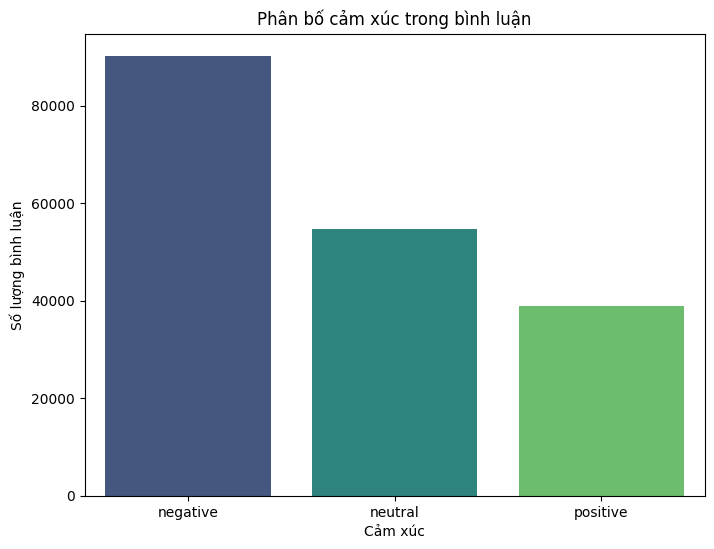

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng từng loại cảm xúc
sentiment_counts = df["Sentiment"].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Phân bố cảm xúc trong bình luận")
plt.xlabel("Cảm xúc")
plt.ylabel("Số lượng bình luận")
plt.show()

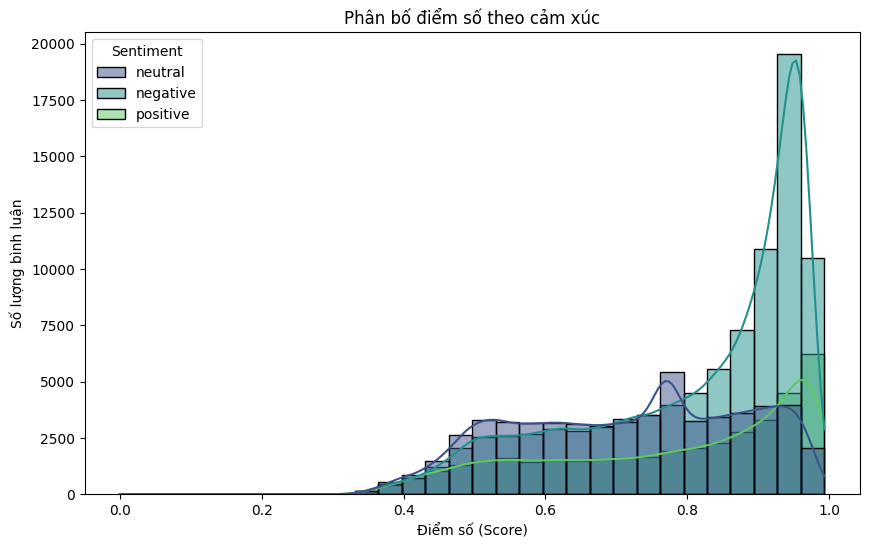

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Score", hue="Sentiment", kde=True, palette="viridis", bins=30)
plt.title("Phân bố điểm số theo cảm xúc")
plt.xlabel("Điểm số (Score)")
plt.ylabel("Số lượng bình luận")
plt.show()

In [48]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Hàm trích xuất top từ phổ biến
def get_top_words(texts, n=10):
    vectorizer = CountVectorizer(stop_words="english")
    word_counts = vectorizer.fit_transform(texts)
    word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0])))
    return word_counts.most_common(n)

# Lấy top từ cho từng loại cảm xúc
positive_comments = df[df["Sentiment"] == "positive"]["comment_text"]
negative_comments = df[df["Sentiment"] == "negative"]["comment_text"]
neutral_comments = df[df["Sentiment"] == "neutral"]["comment_text"]

top_positive_words = get_top_words(positive_comments)
top_negative_words = get_top_words(negative_comments)
top_neutral_words = get_top_words(neutral_comments)

# In kết quả
print("Top từ tích cực:", top_positive_words)
print("Top từ tiêu cực:", top_negative_words)
print("Top từ trung tính:", top_neutral_words)

Top từ tích cực: [('good', 4052), ('game', 2301), ('like', 1986), ('great', 1977), ('just', 1949), ('lol', 1725), ('goal', 1622), ('season', 1457), ('really', 1385), ('best', 1371)]
Top từ tiêu cực: [('just', 8681), ('like', 7323), ('game', 5467), ('arsenal', 4214), ('fucking', 4200), ('shit', 4189), ('don', 4185), ('ball', 4181), ('fuck', 4112), ('ref', 3642)]
Top từ trung tính: [('just', 2642), ('like', 2508), ('lol', 1889), ('game', 1837), ('ball', 1830), ('think', 1736), ('time', 1529), ('did', 1380), ('city', 1344), ('yellow', 1341)]


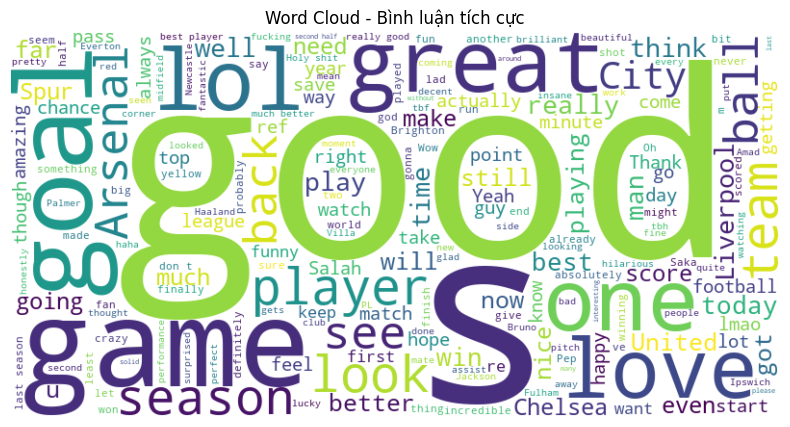

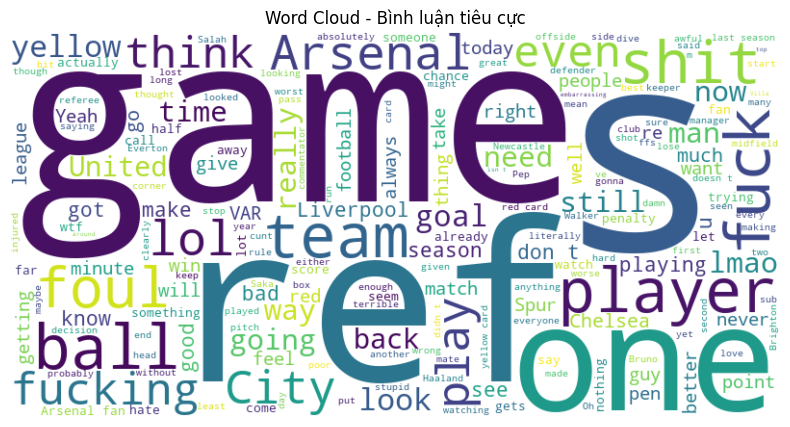

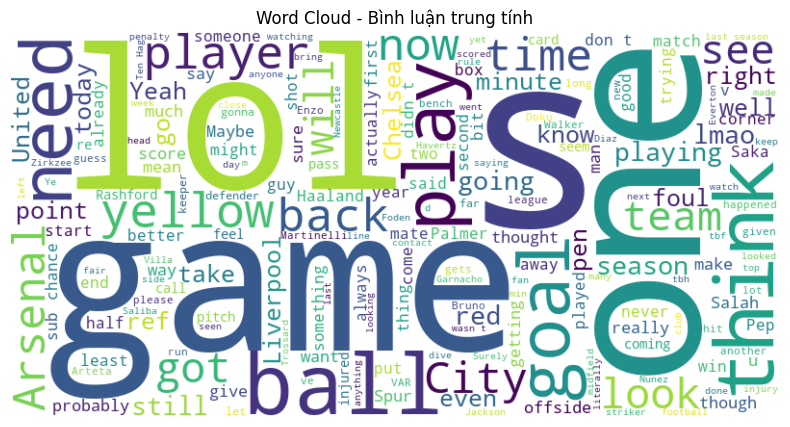

In [49]:
from wordcloud import WordCloud

# Hàm tạo word cloud
def generate_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Tạo word cloud cho từng loại cảm xúc
generate_wordcloud(positive_comments, "Word Cloud - Bình luận tích cực")
generate_wordcloud(negative_comments, "Word Cloud - Bình luận tiêu cực")
generate_wordcloud(neutral_comments, "Word Cloud - Bình luận trung tính")

In [43]:
df

,match_time,matchday,home_team,away_team,home_score,away_score,winner,referee,comment_id,post_id,comment_text,comment_time,comment_author,comment_score,comment_length,Sentiment,Score
0,2024-09-28 14:00,6,Arsenal,Leicester City,4.0,2.0,Arsenal FC,Sam Barrott,lpggml8,1frey5d,"Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. \nLeicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in for that LB position. I honestly wld still rather have him over Zinchenko anyday (still love Zinny) but I still do beleive Benny as RB and Timber at LB is the better option defensively. I won't question the decisions of the Manager though bcuz he is getting results while we still are not playing our best and are missing our talisman in Ode. \nQuick side note I'm curious to see if he wld ever consider the option of Zinny in the Mf. I find he is a liability defensively but good going forward yet he still lacks finishing. Just a though. \n\nEntire point being a team incorporating 2 new defenders, missing their Captain and talisman in Ode, who have suffered 2 very harsh referee decisions resulting in their only dropped points this season are questioned for their credentials to compete. Their closest competitors needed a literal last minute equalizer at home whilst playing a man up for an entire half. The other team has suffered an early loss, does not seem defensively comfortable and is missing their best defender. \n\nToday Arsenal had 37 shots (17 On goal) If they game remained 2-2 that wld have been a fantastic defensive performance by Leicster and their GK. The fact Arsenal got the points shldnt be a detriment. They created the opportunities. They didnt look devoid of creativity. We move on though. I'm truly glad to see this season might shape up to be highly competitive. City are City and I'm sure their checks cleared so they will be up there. Liverpool look exciting under a new Manager and while they arnt the defensive force they have been they are still solid and are among the best going forward. Chelsea seem to be clicking offensively. I still think they will falter defensively which will hold them back at times but they are truly exciting going forward and wont be easy to contain or beat.",1.727592e+09,MateusAmadeus714,2.0,2677,neutral,0.000000
1,2024-12-01 16:00,13,Liverpool,Manchester City,2.0,0.0,Liverpool FC,Chris Kavanagh,lzwds6u,1h464hu,Tell me what you guys think about this premier league table...What emojis can be used for what teams? I tried as best I could lol\n\n| Pos. | 🏆 Team | MP | W | D | L | GF | GA | GD | P | Form |\n|------|--------------------------|----|----|----|----|----|----|-----|----|---------------------|\n| 1 | 🔴 Liverpool | 12 | 10 | 1 | 1 | 24 | 8 | +16 | 31 | ✅ ✅ ✅ 🤝 ✅ |\n| 2 | 🔴 Arsenal | 13 | 7 | 4 | 2 | 26 | 14 | +12 | 25 | ✅ ✅ 🤝 ❌ 🤝 |\n| 3 | 🟡 Brighton | 13 | 6 | 5 | 2 | 22 | 17 | +5 | 23 | 🤝 ✅ ✅ ❌ 🤝 |\n| 4 | 🔵 Manchester City | 12 | 7 | 2 | 3 | 22 | 17 | +5 | 23 | ❌ ❌ ❌ ✅ ✅ |\n| 5 | 🔵 Chelsea | 12 | 6 | 4 | 2 | 23 | 14 | +9 | 22 | ✅ 🤝 🤝 ✅ ❌ |\n| 6 | 🌳 Nottingham Forest | 13 | 6 | 4 | 3 | 16 | 13 | +3 | 22 | ✅ ❌ ❌ ✅ ✅ |\n| 7 | 🐝 Brentford | 13 | 6 | 2 | 5 | 26 | 23 | +3 | 20 | ✅ 🤝 ✅ ❌ ✅ |\n| 8 | 🐓 Tottenham Hotspur | 12 | 6 | 1 | 5 | 27 | 13 | +14 | 19 | ✅ ❌ ✅ ❌ ✅ |\n| 9 | 🟣 Ast

C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_10372\3820625630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["comment_length"] = df["comment_text"].apply(len)
C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_10372\3820625630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sentiment", y="comment_length", palette="viridis")


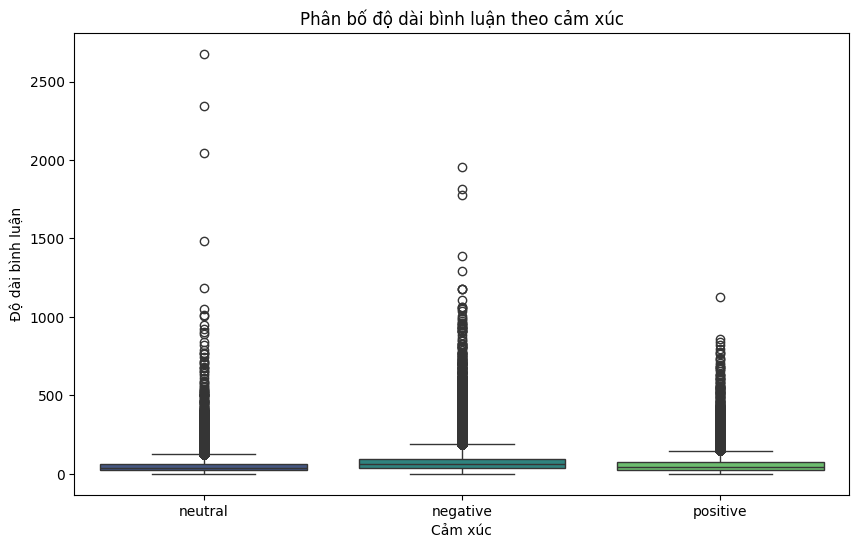

In [50]:
# Thêm cột độ dài bình luận
df["comment_length"] = df["comment_text"].apply(len)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Sentiment", y="comment_length", palette="viridis")
plt.title("Phân bố độ dài bình luận theo cảm xúc")
plt.xlabel("Cảm xúc")
plt.ylabel("Độ dài bình luận")
plt.show()